In [1]:
from adabkb import SafeAdaBKB
from adabkb.options import OptimizerOptions

import numpy as np

from sklearn.gaussian_process.kernels import RBF

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

[0.5]


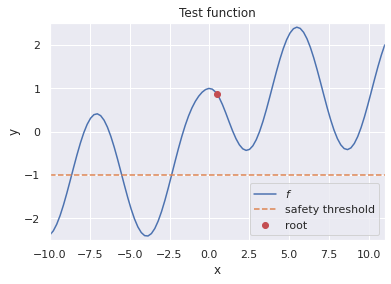

In [2]:

f = lambda x:  np.cos(x) + np.tanh(x) - np.sin(x)
X = np.linspace(-10, 11, 100)
y = f(X)

jmin = -1.0
def plot_fun(points):
    fig, ax = plt.subplots()
    ax.plot(X, y, '-', label="$f$")
    ax.plot(X, [jmin for _ in range(X.shape[0])], '--', label="safety threshold")
    ax.plot(points, [f(x) for x in points], 'ro', ms=6,label="root")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim([X.min(), X.max()])
    ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
    ax.legend(loc="lower right")
    ax.set_title("Test function")

points = [np.mean([-10.0, 11.0])]
print(points)
plot_fun(points)


[--] lcb: -0.9934622551801187	 j_min: -1.0
[--] xt: [-2.3]	 yt: [-0.90066721]
[--] lcb: -0.9937284133273504	 j_min: -1.0
[--] xt: [3.3]	 yt: [0.16754888]
[--] lcb: -0.1622652089518376	 j_min: -1.0
[--] xt: [1.43333333]	 yt: [0.03881133]
[--] lcb: 0.22851644206247634	 j_min: -1.0
[--] xt: [-0.24666667]	 yt: [0.97212187]
[--] lcb: -0.9151446665270643	 j_min: -1.0
[--] xt: [4.98]	 yt: [2.22873911]
[--] lcb: 1.6065202860097327	 j_min: -1.0
[--] xt: [5.44666667]	 yt: [2.41232892]
[--] lcb: 2.2672577957677915	 j_min: -1.0
[--] xt: [5.63333333]	 yt: [2.40121635]
[--] lcb: 2.411305802068856	 j_min: -1.0
[--] xt: [5.49727407]	 yt: [2.41417979]
[--] lcb: 2.4120511383412895	 j_min: -1.0
[--] xt: [5.49727407]	 yt: [2.41417979]
[--] lcb: 2.4124111039483314	 j_min: -1.0
[--] xt: [5.49768889]	 yt: [2.41418]
[--] lcb: 2.412633349862133	 j_min: -1.0
[--] xt: [5.49768889]	 yt: [2.41418]
[--] lcb: 2.4127881387344865	 j_min: -1.0
[--] xt: [5.49768889]	 yt: [2.41418]
[--] lcb: 2.412903928790594	 j_min: -1.

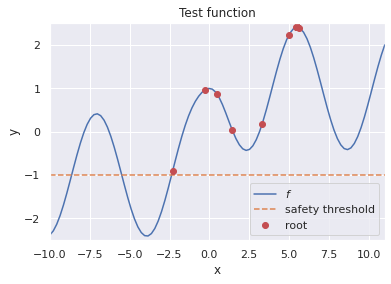

In [3]:
N = 15
sigma = 1.0
lam = 1e-5
gfun = lambda x: 1/sigma * x
v_1 = N
rho = 1/N
kernel = RBF(sigma)
search_space = np.array([-10.0, 11.0]).reshape(-1, 2)
budget = 100
h_max = 5
t = 0

options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=1e-5,
         qbar= 3,
         jmin=jmin)
opt = SafeAdaBKB(kernel, options)
opt.initialize(f, search_space, N, budget, h_max)
while t < budget:
    xt, node_idx = opt.step()
    yt = f(xt)
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
plot_fun(points)

